# Multi-collinearity vs Model Predictions

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read file
df = pd.read_csv('../data_sets/MulticollinearityExample.csv')
#Delet NaN
df = df.dropna()

In [3]:
df.head()

,Femoral Neck,%Fat,Weight kg,Activity,%Fat S,Weight S,Activity S
1,0.888,29.3,61.801964,2773.54,0.734783,7.873772,211.550435
2,0.933,37.7,93.440034,1738.97,9.134783,39.511842,-823.019565
3,0.757,32.8,59.874197,1665.29,4.234783,5.946005,-896.699565
4,1.031,24.6,50.348756,3982.95,-3.965217,-3.579436,1420.960435
5,0.883,26.5,57.606235,2985.74,-2.065217,3.678043,423.750435


### Creation of linear regression objects

In [4]:
X = df.drop(['Activity S'], axis=1)
y = df['Activity S']

In [5]:
#Inicialaize a list to store beta values for each linear regression model
linear_coef = []

#Loop over all the predictors
#In each loop "i" holds the name of the predictor
for i in X:

    x = df[[i]]

    linreg = LinearRegression()

    #Fit the model
    linreg.fit(x,y)

    #Add the coeficient value to the list
    linear_coef.append(linreg.coef_)

In [6]:
#Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

#Fit multilinear regression model on all features of the entire data
multi_linear.fit(X, y)

#Get the coeficient of multi_linear model
multi_coef = multi_linear.coef_

### Printing the individual $\beta$ values

In [14]:
print('Print by simple (one variable) linear regression model for each variable')
predictors = X.columns
for i in range(6):
    print(f'Value of beta{i+1} ({predictors[i]})= {linear_coef[i][0]:.2f}')

Print by simple (one variable) linear regression model for each variable
Value of beta1 (Femoral Neck)= 1518.56
Value of beta2 (%Fat)= -2.66
Value of beta3 (Weight kg)= -7.35
Value of beta4 (Activity)= 1.00
Value of beta5 (%Fat S)= -2.66
Value of beta6 (Weight S)= -7.35


In [15]:
#Helper to compare with multi_linear regression models

print('By multi_linear regression model on all variables')
for i in range(6):
    print(f'Value of beta{i+1} ({predictors[i]}) = {round(multi_coef[i],2)}')

By multi_linear regression model on all variables
Value of beta1 (Femoral Neck) = -0.0
Value of beta2 (%Fat) = 1.96
Value of beta3 (Weight kg) = 8.36
Value of beta4 (Activity) = 1.0
Value of beta5 (%Fat S) = -1.96
Value of beta6 (Weight S) = -8.36


<function matplotlib.pyplot.show(close=None, block=None)>

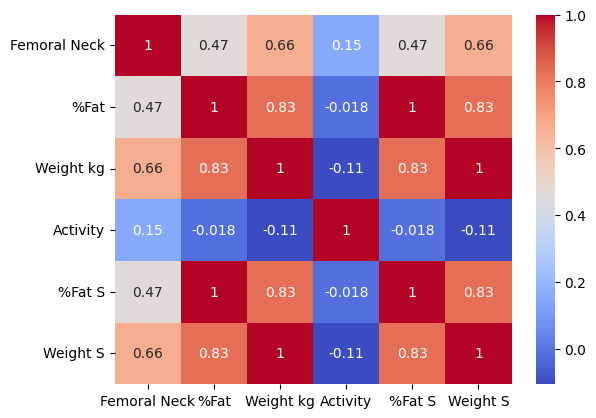

In [18]:
#Helper code to visualize the heatmap of the covariace matrix
corrMatrix = X.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show

### Correlation Analysis

Correlation interpretation:
- Strong correlation: > 0.7 or < -0.7
- Moderate correlation: 0.4 to 0.7 or -0.4 to -0.7
- Weak correlation: < 0.4 or > -0.4

We observe strong correlations between:
1. %Fat and Weight kg
2. %Fat and %Fat S (perfect correlation)
3. Weight kg and Weight S (perfect correlation)

This indicates multicollinearity between these variables, which explains the differences in β coefficients when models are fitted individually vs jointly.

### Correlation Analysis Conclusions

1. Perfect correlations (1.0):
   - Between %Fat and %Fat S
   - Between Weight kg and Weight S
   This suggests these variables are practically the same measure.

2. Strong correlations (>0.7):
   - Between %Fat and Weight kg/Weight S (~0.83)
   Indicates a strong relationship between fat percentage and weight.

3. Moderate correlations (0.4-0.7):
   - Femoral Neck with Weight kg/Weight S (~0.66)
   - Femoral Neck with %Fat (~0.47)

4. Weak correlations (<0.4):
   - Activity with all other variables
   This suggests that activity is more independent.

This correlation structure explains why β coefficients change significantly between simple and multiple models.

### Interpretation of Beta (β) Coefficients in Simple Regression

Each beta represents the regression coefficient for each independent variable when performing simple regression (one variable at a time):

1. β1 = 1518.56 (Femoral Neck):
   - For each unit increase in Femoral Neck, Activity S increases by 1518.56 units
   - This high value suggests a strong influence of bone density on activity

2. β2 = -2.66 (%Fat):
   - For each unit increase in fat percentage, Activity S decreases by 2.66 units
   - Indicates a negative relationship between body fat and activity

3. β3 = -7.35 (Weight kg):
   - For each kg increase in weight, Activity S decreases by 7.35 units
   - Shows a negative relationship between weight and activity

4. β4 = 1.00 (Activity):
   - 1:1 relationship with Activity S
   - This coefficient suggests this variable is the same activity measure

5. β5 = -2.66 (%Fat S):
   - Identical to β2 due to perfect collinearity with %Fat
   - Confirms that %Fat and %Fat S are the same variable

6. β6 = -7.35 (Weight S):
   - Identical to β3 due to perfect collinearity with Weight kg
   - Confirms that Weight kg and Weight S are the same variable

### Important observations:
1. The identical values of β2/β5 and β3/β6 confirm perfect collinearity
2. The magnitude of β1 suggests that Femoral Neck could be an important predictor
3. The value of β4=1.00 indicates that Activity and Activity S are equivalent measures
4. The negative signs in β2, β3, β5, and β6 suggest that both weight and body fat are inversely related to activity